#  MobileNetV1 — Depthwise Separable Convolution (Light Weight Model)
- Depthwise Separable Convolution is used to reduce the model size and complexity. It is particularly useful for mobile and embedded vision applications.
- Smaller model size: Fewer number of parameters
- Smaller complexity: Fewer Multiplications and Additions (Multi-Adds)

https://prabinnepal.com/mobilenet-architecture-explained/ 
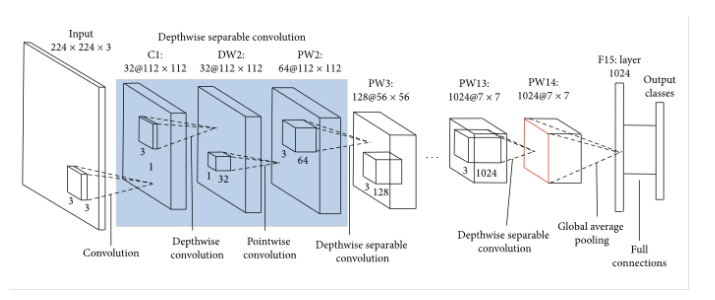
**Topics**
- Standard convolutions and depthwise separable convolutions
- MobileNet Architecture
- Width Multiplier to achieve thinner models
- Resolution Multiplier for reduced representation
- Architecture Implementation

## Standard convolutions and depthwise separable convolutions
- Convolution operation consists of an input image, a kernel or filter that slides through the input image and outputs a feature map. The main aim of convolution operation is to extract features from the input image. As we know, every image can be considered as a matrix of pixel values. Consider an input as 5×5 matrix with values of pixels 0 and 1 as shown below:

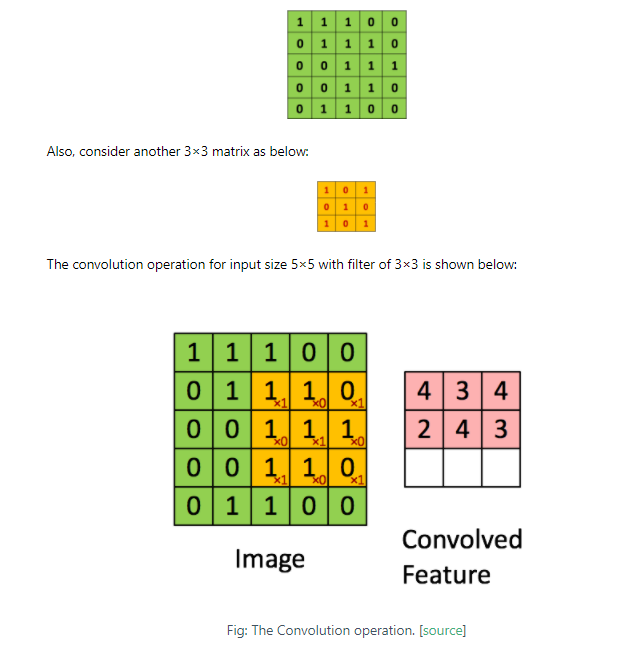
- We are sliding the 3×3 matrix over 5×5 input matrix and performing element-wise matrix multiplication and adding the multiplication output to get convolved feature. The output obtained from such operation is also called as feature map. The 3×3 matrix that is sliding over the input matrix is known as filter or kernel 

**Separable Convolutions**
- Before knowing what depth-wise separable convolutions do, let’s know about separable convolutions. There are **two types of separable convolutions: spatial separable convolutions and depthwise separable convolutions.**

**Spatial separable convolutions**

- Spatial Separable convolutions deals with spatial dimension of the image (width and height). It divides a kernel into two smaller kernel. For example, a 3*3 kernel is divided into a 3*1 and a 1*3 kernel.

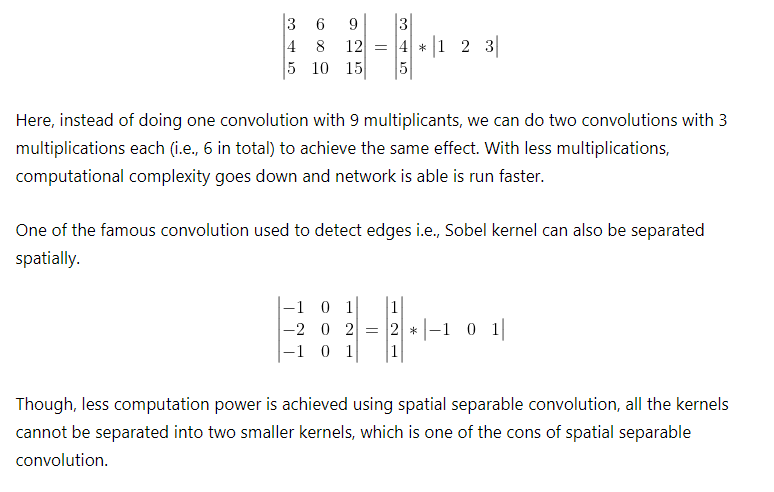 
**Depthwise Separable Convolutions**
- Depthwise Separable Convolutions is what Mobilenet architecture is based on. Depthwise separable convolution works with kernel that cannot be factored into two smaller kernels. Spatial separable convolutions deals with spatial dimensions but depthwise separable convolutions deals with depth dimension also.


- Depthwise separable convolution is a factorized convolution that factorizes standard convolution into a depthwise convolution and a 1*1 convolution called pointwise convolution. Depthwise separable convolutions splits kernel into two separate kernels for filtering and combining. Depthwise convolution is used for filterning whereas pointwise convolution is used for combining.


- Using depthwise separable convolutions, the total computation required for the operation is the sum of depthwise convolution and pointwise convolution which is:

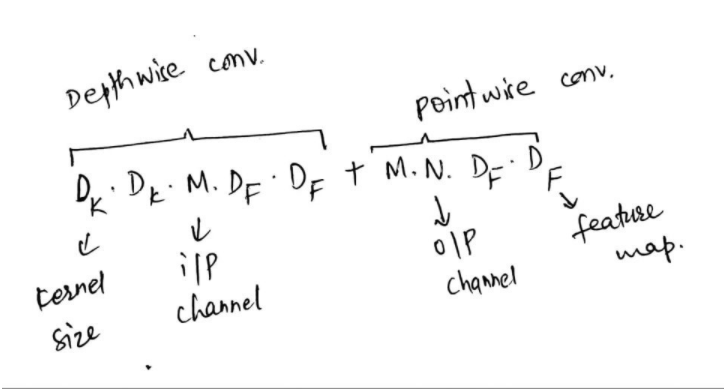
For standard convolution, total computation is:


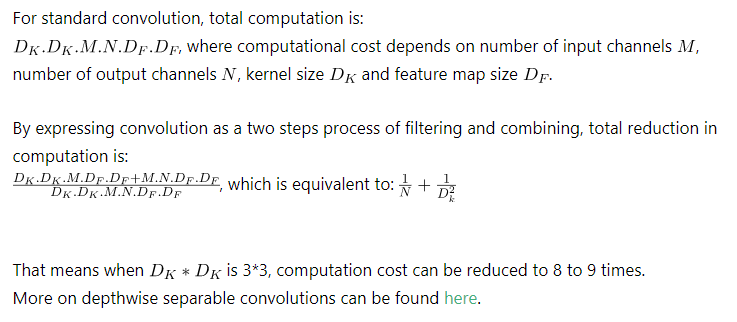
## MobileNet Architecture
- As mentioned above, mobilenet is built on depthwise separable convolutions, except for first layer. First layer is a full convolutional layer.
-  layers are followed by batch normalization and ReLU non-linearity. However, final layer is a fully connected layer without any non-linearity and feeds to the softmax for classification.
- For down sampling, strided convolution is used for both depthwise convolution as well as for first fully convolutional layer.
- The total number of layers for mobilenet is 28 considering depthwise and pointwise convolution as separate layers.


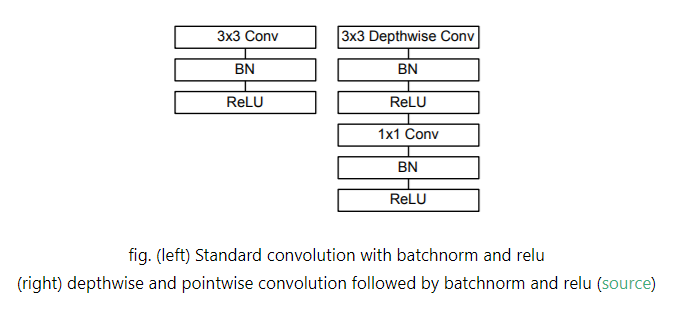

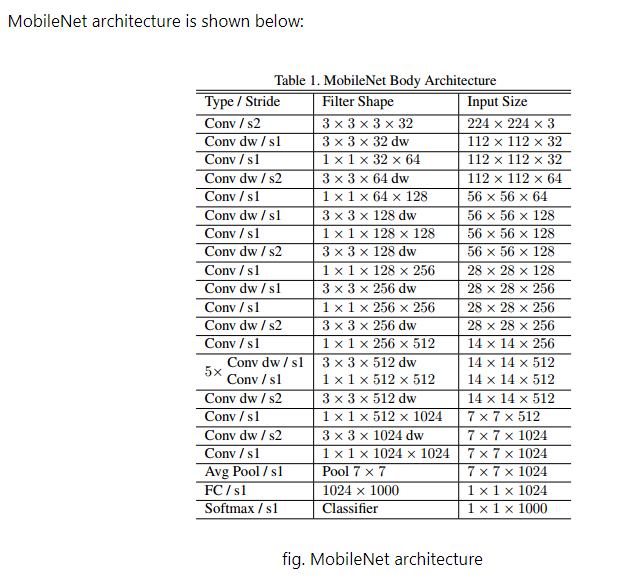

## Width Multiplier to achieve Thinner Models 
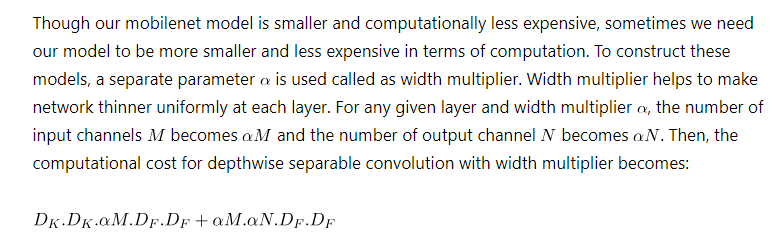

Width multiplier can be applied to any model structure to define a new smaller model
with a reasonable accuracy, latency and size trade off. It
is used to define a new reduced structure that needs to be
trained from scratch.

## Resolution Multiplier for reduced representation 
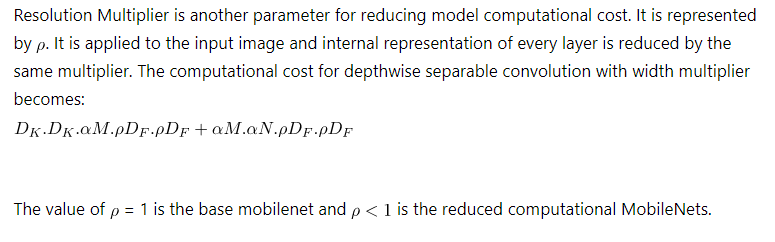

## Architecture Implementation 
> MobileNet uses depthwise separable convolutions where each layers is followed by BatchNormalization and ReLU non-linearity. MobileNet contains a depthwise and a pointwise convolution layer


In [1]:
def mobilenet_block(x, filters, strides):
  x = keras.layers.DepthwiseConv2D(kernel_size=3, strides=strides, padding='same')(x)
  x = keras.layers.BatchNormalization()(x)
  x = keras.layers.ReLU()(x)
  x = keras.layers.Conv2D(filters=filters, kernel_size=1, strides=1, padding='same')(x)
  x = keras.layers.BatchNormalization()(x)
  x = keras.layers.ReLU()(x)
  return x 

MobileNet uses input_shape of 224*224*3. First layer of mobilenet is a Convolutional layer with 32 filters, 3*3 kernel and stride of 2. This is followed by BatchNormalization and ReLU non-linearity.

In [2]:
INPUT_SHAPE = 28, 28, 3
input = keras.layers.Input(INPUT_SHAPE)
x = keras.layers.Conv2D(filters=32, kernel_size=3, strides=2, padding='same')(input)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.ReLU()(x)

NameError: name 'keras' is not defined

After first layers, there is a series of mobilenet block with different kernel sizes and filters.

In [3]:
x = mobilenet_block(x, filters=64, strides=1)


x = mobilenet_block(x, filters=128, strides=2)
x = mobilenet_block(x, filters=128, strides=1)

x = mobilenet_block(x, filters=256, strides=2)
x = mobilenet_block(x, filters=256, strides=1)

x = mobilenet_block(x, filters=512, strides=2)
for _ in range(5):
  x = mobilenet_block(x, filters=512, strides=1)
x = keras.layers.AveragePooling2D(pool_size=7, strides=1)(x)
output = keras.layers.Dense(1000, activation='softmax')(x)

NameError: name 'x' is not defined

# MobileNet V2 
**The main idea:**

**1.Expansion layer**
- Before DW(Depth Wise) deep convolution, use PW(Point Wise) convolution to increase the dimension (upgrading multiple is t, t=6), and then perform convolution operation in a higher-dimensional space to extract feature
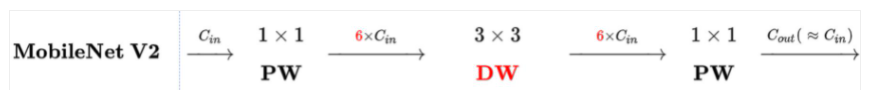

**2.Inverted residuals**
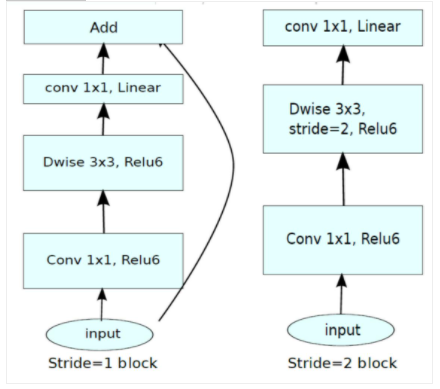 
3. Added 1×1 dimension upgrade, introduced Shortcut and **Removed the last ReLU**, Changed to Linear. When the step size is 1, first perform 1×1 convolution to increase the dimension, then perform deep convolution to extract features, and then reduce the dimensionality through Linear point-by-point convolution. Add input and output to form a residual structure. When the step size is 2, because the size of input and output do not match, no shortcut structure is added, and the rest are the same.

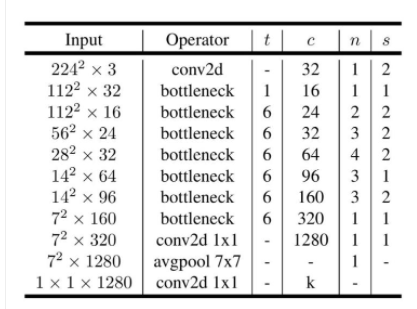

## differnce between mobilenet v2 and v3
MobileNetV3-Large is 3.2% more accurate on ImageNet classification while reducing latency by 20% compared to MobileNetV2. MobileNetV3-Small is 6.6% more accurate compared to a MobileNetV2 model with comparable latency. ... All latencies were measured on a single large core of the same device using TFLite 

# MobileNet V3 
> MobileNet V3 Published in 2019, the V3 version combines the depth of V1, the V2's Invered Residuals, and Linear Bottleneck, SE modules, using NAS (Neural Search) to search for the configuration and parameters of the network. This approach has far exceeds the artificial adjustment, it is terrible.

V3 has the following improvements on V2 versions:  
- The authors found that the most cost-effective layer is the input and output layer of the network, so the author has improved the two parts. As shown in the figure below, the last output of V2 is several layers, and below is a few layers of the last output of V3. It can be seen that the V3 version will take the average pink level. After expanding using 1 × 1 volume, the pool layer-activation function is immediately used, and finally the output of 1 × 1 convolution is used. Through this change, it can reduce the delay of 10ms, increased by 15% of the calculation speed, and there is almost no precision loss. Second, the input is expanded into 32 dimensions for the input layer of V2. The author found that the use of the RELU or SWITCH activation function can reduce the number of channels to 16-dimensional, and the accuracy remains unchanged. This also saves 3ms delays. 
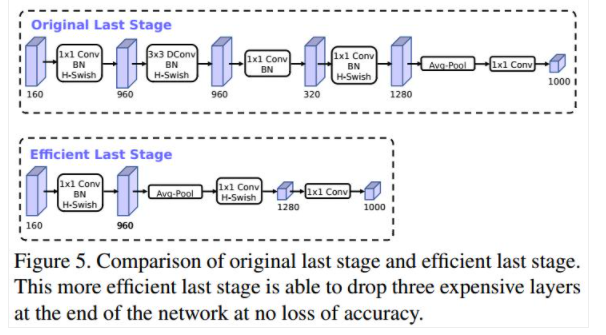
- Since the embedded device calculates SIGMOID is a considerable computing resource, the author proposes H-Switch as an activation function. And with the deepening of the network, the cost of nonlinear activation functions will also be reduced. So, only the H-Switch is available in a deeper layer to achieve greater advantages.


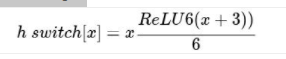
- The SE module is introduced on the Block of the V2, and the SE module is a lightweight channel attention module. After depthwise, pass through the pool layer, then the first FC layer, the number of channels is 4 times, and then the second FC layer is passed, the channel number transforms back (exit 4 times), and then multiplies with Depthwise. 

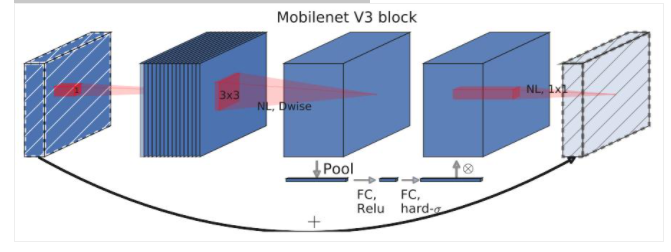
Finally, the structure of the V3 is shown below. The authors provide two versions of V3, which are LARGE and SMALL, respectively, corresponding to high resources and low resources. Both are searched using NAS.  


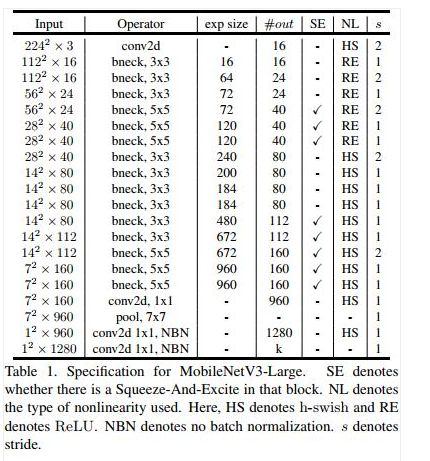

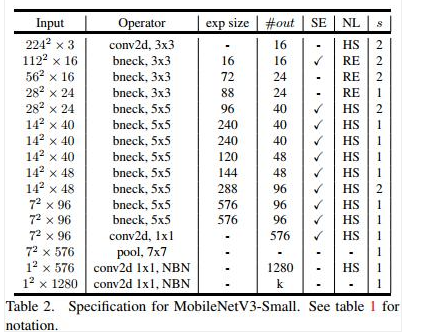

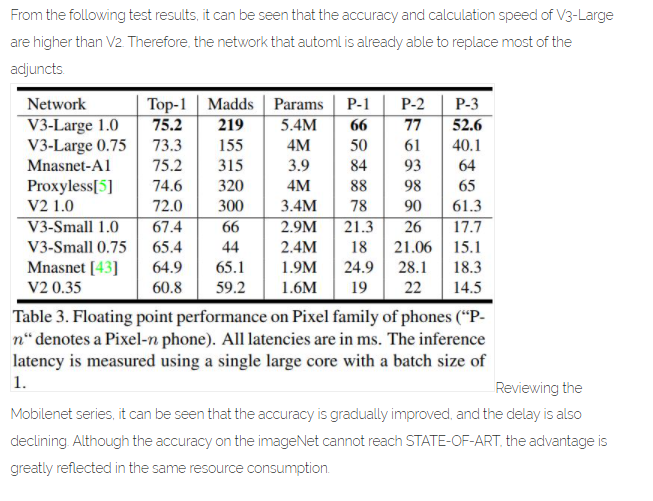

https://www.programmersought.com/article/73408131416/